In [38]:
# Import necessary libraries.
import pandas as pd
import openai

# Configure the baseline configuration of the OpenAI library.
openai.api_type = "azure"
openai.api_base = "<YOUR_AOAI_ENDPOINT>"
openai.api_version = "2022-12-01"
openai.api_key = "<YOUR_AOAI_KEY>"

In [40]:
# Load csv data to Pandas dataframe and display the header.
df = pd.read_csv('./data/asos_transform.csv')
df.head()


,Title,Contents,Date
0,I love ASOS,I love ASOS and allCustomer service they are j...,"Dec 14, 2019"
1,Quality customer service,My order was left outside and the school kids ...,"Dec 14, 2019"
2,Helpful and friendly staff.,Helpful and friendly staff.,"Dec 14, 2019"
3,Replied quickly and made sure their…,Replied quickly and made sure their customers ...,"Dec 14, 2019"
4,Helpful customer service officer but problemat...,Rebecca was patient and helpful with my querie...,"Dec 14, 2019"


In [41]:
# Check dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     2000 non-null   object
 1   Contents  2000 non-null   object
 2   Date      2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [42]:
# Select the top 10 rows from the dataframe. It's part of the reviews on 14 Dec 2019.
# df_10 = df.head(10)

# Return a new DataFrame that is a random sample of 10 rows from your original DataFrame.
df_random_10 = df.sample(n=10)


In [44]:
# Random 10 version
# Primary functions to interact with AOAI GPT-3 to obtain insights.
review_content_list = []

for index, headers in df_random_10.iterrows():
    review_content = str(headers["Contents"])
    print("Review Content: {}".format(review_content))
    # Use AOAI GPT-3 to classify the sentiment of the review content.
    response = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Classify the sentiment of the following review content following categories: \
      categories: [Negative, Netural, Positive]\n\nreview content : " + review_content + "\n\nClassified sentiment:",
      max_tokens=10)
    classified_sentiment = response['choices'][0]['text'].replace(" ", "")
    # print("Classified Sentiment of Review Content: {}".format(classified_sentiment))
    print("Sentiment Classified")
    
    # Use AOAI GPT-3 to summarize the review content.
    response2 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Summarize the following review content in one sentence:" \
      + review_content + "\n\nOne Sentence:",
      max_tokens=100)
    summarized_sentence = response2['choices'][0]['text'].replace("\n","")
    # print("Summarize Sentence from the Review Content: {}".format(summarized_sentence))
    print("Summarize Sentence Generated")
    
    # Use AOAI GPT-3 to summarize 3 keyword based on the review content.
    response3 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Based on the review content, summarize in 3 keywords:" \
      + review_content + "\n\nKeywords:",
      max_tokens=20)
    summarized_keywords = response3['choices'][0]['text'].replace("\n","").replace(".","")
    # print("Summarize 3 Keywords from the Review Content: {}".format(summarized_keywords))
    print("Summarize Keywords Generated")
    
    # Use AOAI GPT-3 to craft a reply message based on the review content.
    response4 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Based on the review content, craft a reply message:" \
      + review_content + "\n\nReply Message:",
      max_tokens=100)
    reply_message = response4['choices'][0]['text'].replace("\n","")
    # print("Draft of reply message based on the Review Content: {}".format(reply_message))
    print("Draft of Reply Message Generated")
    
    # Append the insights result into a list.
    review_content_list.append([review_content, classified_sentiment, summarized_sentence, summarized_keywords, \
                                reply_message])

# Convert the list of insights into a Pandas dataframe.
review_content_df = pd.DataFrame(review_content_list, columns=['review_content', 'classified_sentiment', \
                                                               'summarized_sentence', 'summarized_keywords', \
                                                               'reply_message'])

Review Content: Was the best customer service I've ever had. Problem sorted with no issues.
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Quick to respond and clear concise answer. Thank you
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Yusuf was quick in arranging a replacement for the faulty t-shirt I received, Asos customer support service 5 stars as always
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Perfect service, very easy communication, pleasant experience!
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Nigel, my customer service rep, was excellent. My package said it was delivered, and was not anywhere. I let him know and he was kind, understanding, and 

In [45]:
# Display the result dataframe with the insights from AOAI GPT-3.
review_content_df

,review_content,classified_sentiment,summarized_sentence,summarized_keywords,reply_message
0,Was the best customer service I've ever had. P...,Positive,"The customer service was outstanding, and the...","Customer Service, Problem Solved, Satisfied",Thank you so much for your kind words! We str...
1,Quick to respond and clear concise answer. Tha...,Positive,The response was quick and helpful.,"Quick, Clear, Concise",You're welcome! We strive to provide fast and...
2,Yusuf was quick in arranging a replacement for...,Positive,"Asos customer service was excellent, as Yusuf...","Asos, Customer Support, Quick Response",Thank you for your 5-star review of our custom...
3,"Perfect service, very easy communication, plea...",Positive,"The service was perfect, communication was ea...","Service Excellence, Easy Communication, Posit...",Thank you for your kind words! It is our ple...
4,"Nigel, my customer service rep, was excellent....",Positive,"Nigel was an excellent customer service rep, ...","Understanding, Responsive, Excellent",Thank you for your kind words regarding Nigel...
5,Good and fast reply,Positive,The review praised the good and fast reply.,"Fast, Positive, Responsive",Thank you for your kind words! We appreciate ...
6,Francesca is a BABEshe totally got my issue an...,Positive,Francesca is an amazing advisor at ASOS who i...,"ASOS, Francesca, Empathy",Thanks so much for taking the time to share yo...
7,Thank for your help. Hope to solve the problem...,Positive,The reviewer expressed gratitude for the help...,"gratitude, assistance, resolution",Thank you for taking the time to provide your...
8,she is very nice and patient,Positive,She is an especially pleasant and patient ind...,"Patient, Kind, Understanding",Thank you so much for your kind words! We are...
9,I wish I could put less than 1 star! Things ta...,Negative,This company has terrible customer service an...,"Slow Refund, Unsuspecting Fees, Worst Experience",We apologize for the difficulty you experience...


In [46]:

# Save the result dataframe into a CSV file.
review_content_df.to_csv("./data/analyzed_review_content.csv")

In [47]:
# Concatenate all the review content into a single string.
review_content_string = review_content_df['review_content'].to_string(header=False, index=False)
print(review_content_string)

Was the best customer service I've ever had. Pr...
Quick to respond and clear concise answer. Than...
Yusuf was quick in arranging a replacement for ...
Perfect service, very easy communication, pleas...
Nigel, my customer service rep, was excellent. ...
                               Good and fast reply
Francesca is a BABEshe totally got my issue and...
Thank for your help. Hope to solve the problem ...
                      she is very nice and patient
I wish I could put less than 1 star! Things tak...


In [48]:
# Use AOAI GPT-3 to summarize all the review content.
response5 = openai.Completion.create(
  engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
  prompt="Summarize the following review content in 100 words" + review_content_string + "\n\nSummary:",
  max_tokens=120)

all_review_content_summary = response5['choices'][0]['text'].replace("\n","")
print(all_review_content_summary)

 Yusuf quickly arranged a replacement, and Nigel and Francesca provided excellent service. The responses were fast, clear and concise, and Francesca was particularly great in dealing with a customer issue. The customer was appreciative of their help, though someone else had a negative experience, saying things weren't resolved quickly enough. Overall, the customer service received was excellent.


<Axes: ylabel='review_content'>

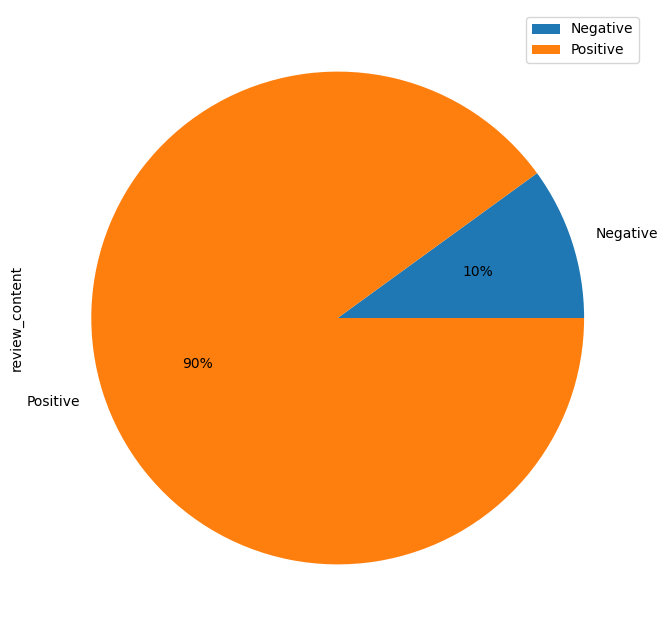

In [49]:
# Visualize the classified sentiment of the review content as a pie chart.
review_content_df.groupby(['classified_sentiment']).count().plot(kind='pie',y='review_content', autopct='%1.0f%%', \
                                                                figsize =(8,8))